In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
from graphviz import Source

In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi\r\n1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0\r\n2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0\r\n3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1\r\n4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0\r\n5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1\r\n6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1\r\n7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0\r\n8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1\r\n9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0\r\n10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1\r\n11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0\r\n12,1343,0,2.9,0,2,1,34,0.8,171,3,6,235,1671,3911,15,8,8,1,1,1\r\n13,900,1,1.4,1,0,0,30,1,87,2,3,829,1893,439,6,2,2

In [ ]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.duplicated().sum() # дубликаты

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df2.duplicated().sum() # дубликаты

0

# Обучение

In [ ]:
del df2['id']

In [ ]:
X = df.drop('price_range', axis = 1)
y = pd.DataFrame(df['price_range'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
clf = DecisionTreeClassifier(random_state=8, max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7735714285714286

# Оценка различными метриками

In [ ]:
clf.score(X_test, y_test)

0.7516666666666667

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       140
           1       0.63      0.82      0.71       157
           2       0.73      0.47      0.57       157
           3       0.79      0.95      0.86       146

    accuracy                           0.75       600
   macro avg       0.77      0.76      0.75       600
weighted avg       0.76      0.75      0.74       600



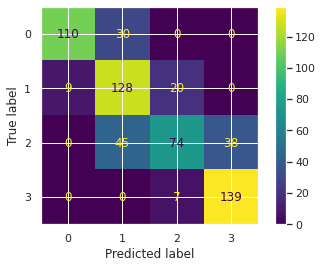

In [ ]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

<Axes: xlabel='price_range', ylabel='count'>

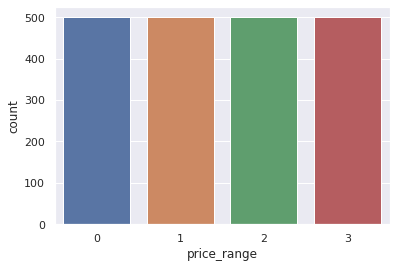

In [ ]:
sns.countplot(x=df['price_range'])

# Визуализация модели

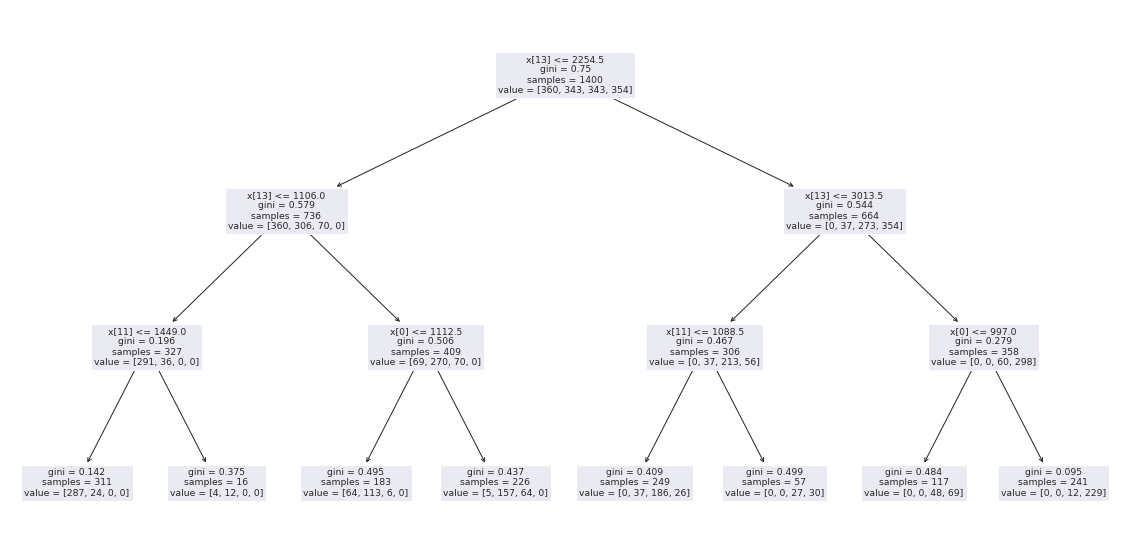

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf)
plt.show()

x[...] - информативыне переменные

In [ ]:
clf.feature_importances_

array([0.06371717, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0441655 , 0.        , 0.89211733, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
clf.feature_names_in_

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

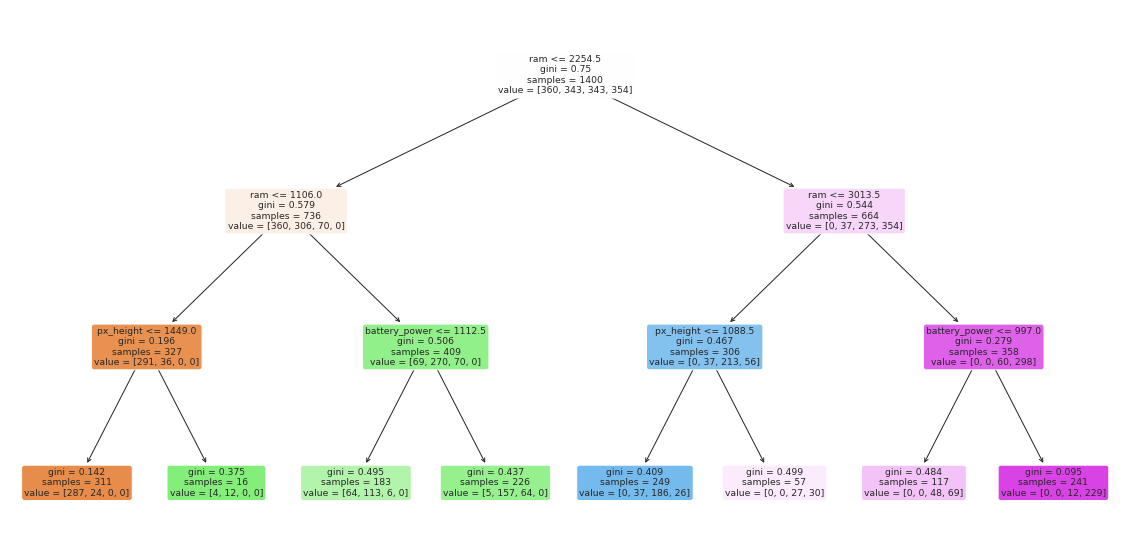

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=clf.feature_names_in_, rounded=True, filled=True)
plt.show()

# Нормализация и обучение

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_ss = StandardScaler()
scaler_ss.fit(X_train)
X_train_ss = pd.DataFrame(scaler_ss.transform(X_train), columns=X_train.columns)
X_test_ss = pd.DataFrame(scaler_ss.transform(X_test), columns=X_test.columns)

scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train)
X_train_mm = pd.DataFrame(scaler_mm.transform(X_train), columns=X_train.columns)
X_test_mm = pd.DataFrame(scaler_mm.transform(X_test), columns=X_test.columns)

In [ ]:
clf.score(X_test, y_test)

0.7516666666666667

In [ ]:
clf_norm_ss = DecisionTreeClassifier(random_state=8, max_depth=3)
clf_norm_ss.fit(X_train_ss, y_train.values.ravel())
clf_norm_ss.score(X_test_ss, y_test.values.ravel())

0.7516666666666667

In [ ]:
clf_norm_mm = DecisionTreeClassifier(random_state=8, max_depth=3)
clf_norm_mm.fit(X_train_mm, y_train.values.ravel())
clf_norm_mm.score(X_test_mm, y_test.values.ravel())

0.7516666666666667

# Подбор гиперпараметров с помощью RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {"max_depth": [2, 3, 5, 7, 10],
          "max_features": range(1, 30),
          "min_samples_split": [5, 10, 20],
          "min_samples_leaf": [1, 2, 10]}

rnd_s = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter=200)
clf_random = rnd_s.fit(X_train, y_train)
clf_random.score(X_train, y_train)

(0.915, 0.835)

In [ ]:
clf_random.score(X_test, y_test)

0.835

In [ ]:
clf_random.feature_names_in_

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

# Плюсы и минусы:
**Плюсы:**

Очевидный алгоритм подбора гиперпараметров

Небольшое количество гипер параметров

Четкие правила классификации

Легко визуализируются

Быстро обучаются и прогносизуются

**Минусы:**

деревья очень чувствительны к шумам во входных данных

Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений.

Сложность нахождения отимального дерева(тк не всегда для этого подойдут жадные алгоритмы)

# Ансамблевые методы

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test.values.ravel())

0.86

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=1, random_state=7).fit(X_train, y_train.values.ravel())
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test.values.ravel())

0.8116666666666666

In [ ]:
params = {"max_depth": [10],
          "max_features": range(1, 30),
          "min_samples_split": [10],
          "min_samples_leaf": [1]}

random_search = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10)
clf_random = random_search.fit(X_train, y_train.values.ravel())

random_search.best_score_, random_search.best_params_

(0.8957142857142856,
 {'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 9,
  'max_depth': 10})

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test.values.ravel())

0.6666666666666666